In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.utils.data as data
import torchvision.transforms as transforms
import torch.nn.functional as F
import utils
import warnings
import model_1
import random
import os
import shutil
warnings.filterwarnings("ignore")

In [2]:
seed = 3
random.seed(seed)
torch.manual_seed(seed)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
AB_scale = 128
width = height = 128
batch_size = 32
datasets = ['anime','doberman','mariposas', 'landscapes']
indice_dataset = 3

In [4]:
img_transform = transforms.Compose([transforms.ToTensor()]) 
dataset = utils.LabDataSet(f'data/{datasets[indice_dataset]}_{width}',
                img_transform, train_size=6500, test_size=629, height=height, width=width, seed=seed)

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=dataset.train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=dataset.test_set, batch_size=batch_size, shuffle=False)

Epoch [1 / 200] average train error: 0.011973, average test error: 0.011875
Epoch [6 / 200] average train error: 0.008737, average test error: 0.008660
Epoch [11 / 200] average train error: 0.008361, average test error: 0.008572
Epoch [16 / 200] average train error: 0.007923, average test error: 0.008753
Epoch [21 / 200] average train error: 0.007257, average test error: 0.009392


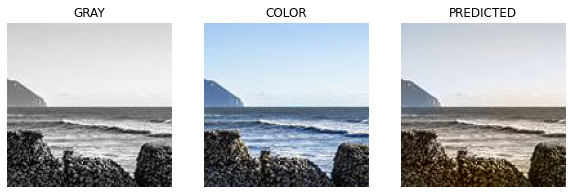

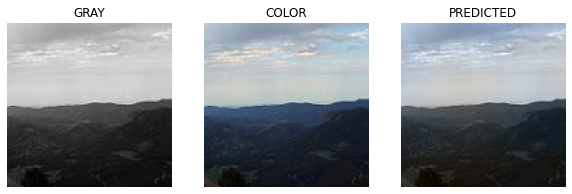

Epoch [26 / 200] average train error: 0.005942, average test error: 0.009513
Epoch [31 / 200] average train error: 0.004631, average test error: 0.009593
Epoch [36 / 200] average train error: 0.003709, average test error: 0.009559
Epoch [41 / 200] average train error: 0.003095, average test error: 0.009415


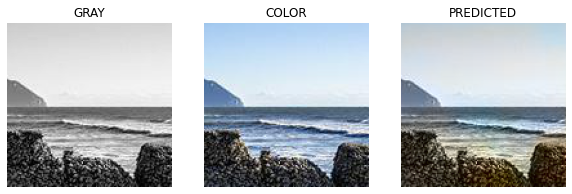

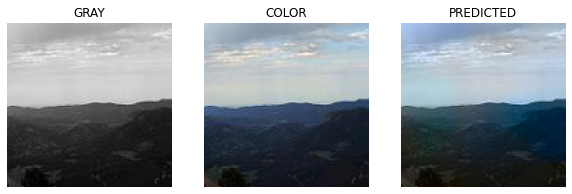

Epoch [46 / 200] average train error: 0.002732, average test error: 0.009521
Epoch [51 / 200] average train error: 0.002453, average test error: 0.009697
Epoch [56 / 200] average train error: 0.002225, average test error: 0.009615
Epoch [61 / 200] average train error: 0.002118, average test error: 0.009738


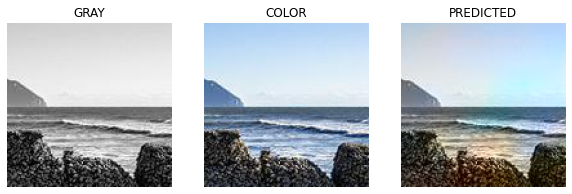

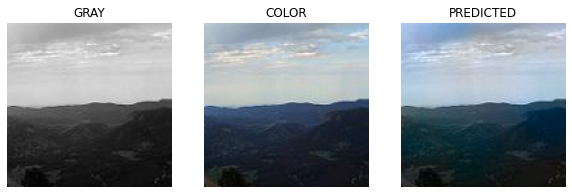

Epoch [66 / 200] average train error: 0.001964, average test error: 0.009886
Epoch [71 / 200] average train error: 0.001937, average test error: 0.009808
Epoch [76 / 200] average train error: 0.001809, average test error: 0.009907
Epoch [81 / 200] average train error: 0.001706, average test error: 0.009795


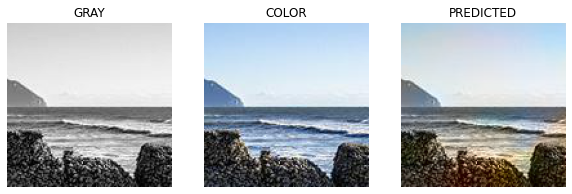

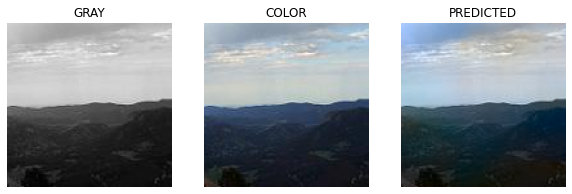

Epoch [86 / 200] average train error: 0.001786, average test error: 0.009671
Epoch [91 / 200] average train error: 0.001615, average test error: 0.009693
Epoch [96 / 200] average train error: 0.001589, average test error: 0.009761
Epoch [101 / 200] average train error: 0.001596, average test error: 0.009828


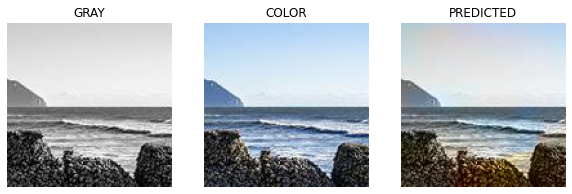

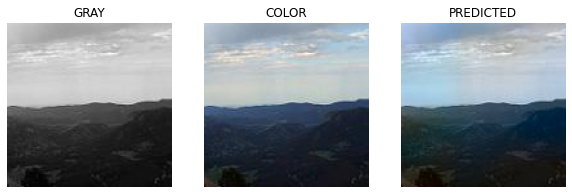

Epoch [106 / 200] average train error: 0.001792, average test error: 0.009909
Epoch [111 / 200] average train error: 0.001463, average test error: 0.009712
Epoch [116 / 200] average train error: 0.001484, average test error: 0.009704
Epoch [121 / 200] average train error: 0.001457, average test error: 0.009791


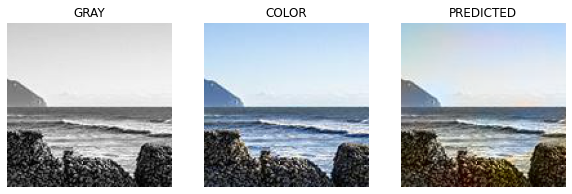

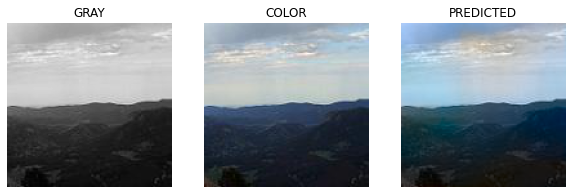

Epoch [126 / 200] average train error: 0.001448, average test error: 0.009657
Epoch [131 / 200] average train error: 0.001382, average test error: 0.009625
Epoch [136 / 200] average train error: 0.001437, average test error: 0.009697
Epoch [141 / 200] average train error: 0.001323, average test error: 0.009701


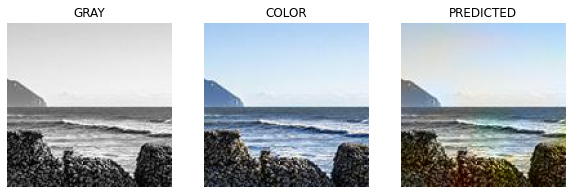

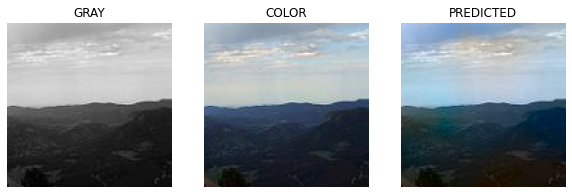

Epoch [146 / 200] average train error: 0.001370, average test error: 0.009665
Epoch [151 / 200] average train error: 0.001333, average test error: 0.009693
Epoch [156 / 200] average train error: 0.001303, average test error: 0.009655
Epoch [161 / 200] average train error: 0.001297, average test error: 0.009719


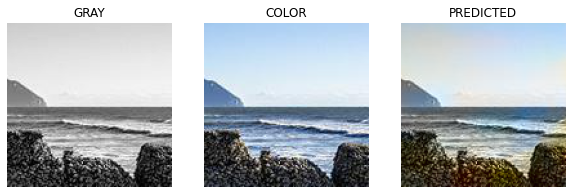

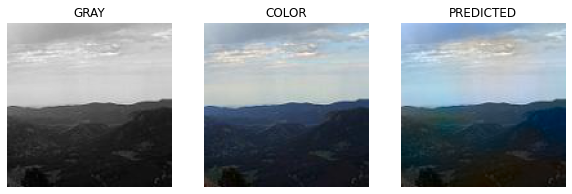

Epoch [166 / 200] average train error: 0.001475, average test error: 0.009649
Epoch [171 / 200] average train error: 0.001222, average test error: 0.009534
Epoch [176 / 200] average train error: 0.001257, average test error: 0.009698
Epoch [181 / 200] average train error: 0.001285, average test error: 0.009698


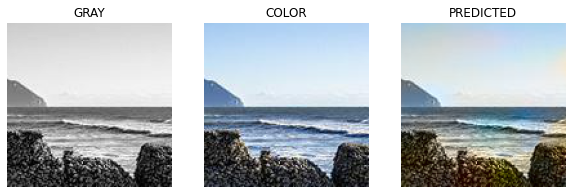

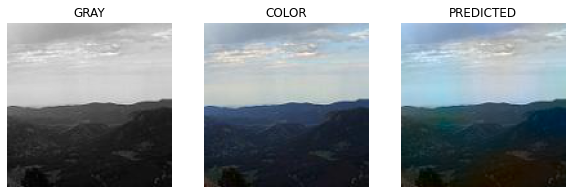

Epoch [186 / 200] average train error: 0.001207, average test error: 0.009605
Epoch [191 / 200] average train error: 0.001231, average test error: 0.009743
Epoch [196 / 200] average train error: 0.001206, average test error: 0.009636
Epoch [200 / 200] average train error: 0.001251, average test error: 0.009751


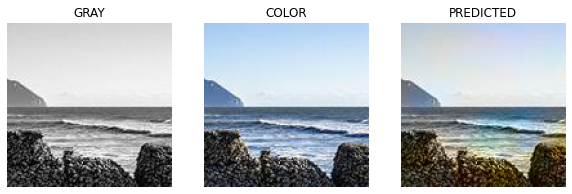

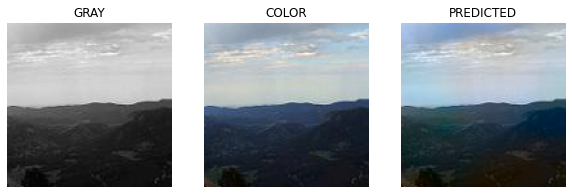

In [6]:
learning_rate = 1e-3
autoencoder = model_1.Autoencoder()
autoencoder.to(device)

loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate)

autoencoder.train()
train_loss_result, test_loss_result = utils.train(device,autoencoder,train_loader,test_loader,200,loss, optimizer, height, width)

In [7]:
utils.save_model(device, autoencoder, "landscapes_128_arch1", train_loss_result, test_loss_result, train_loader, test_loader, height=height, width=width, batch_size=32)

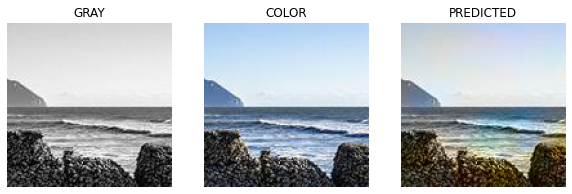

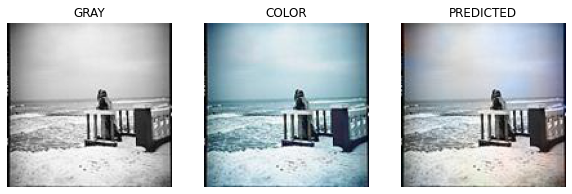

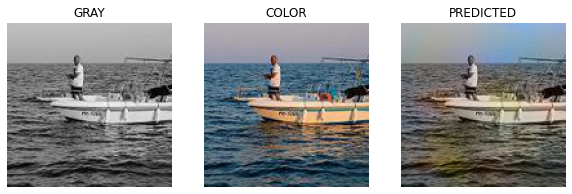

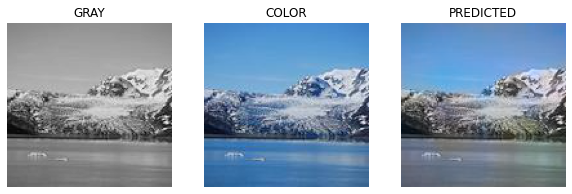

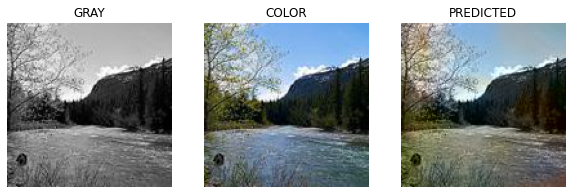

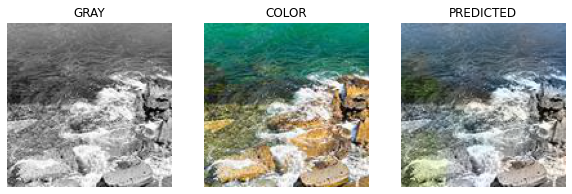

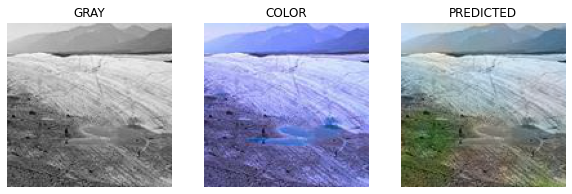

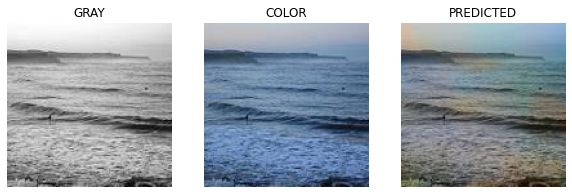

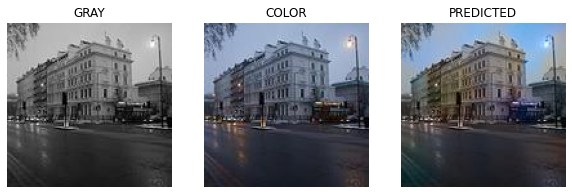

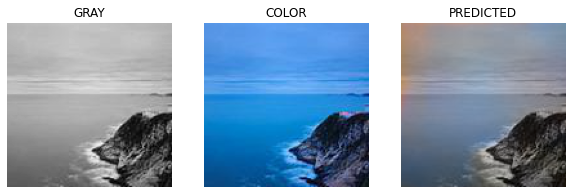

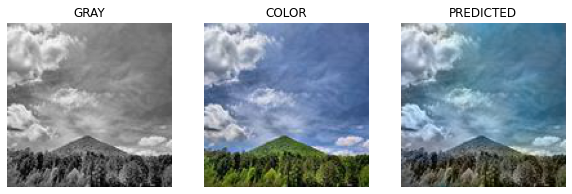

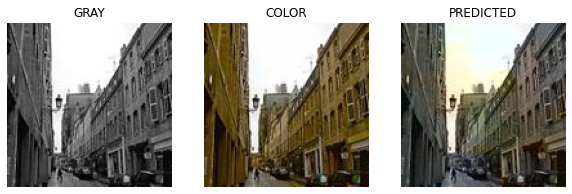

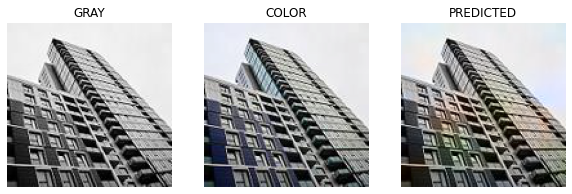

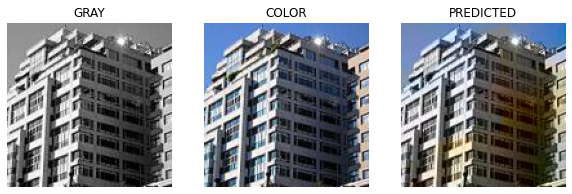

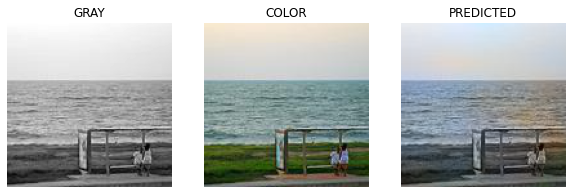

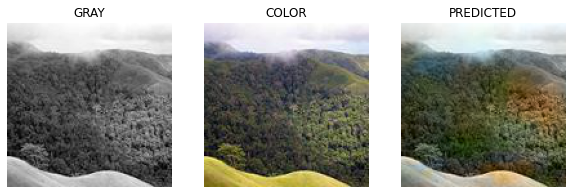

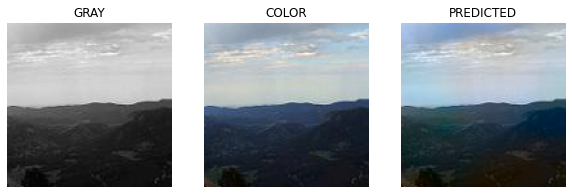

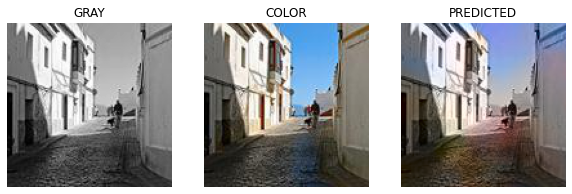

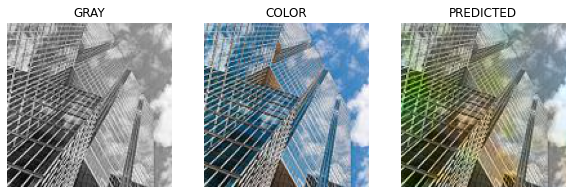

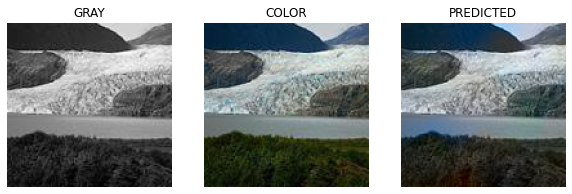

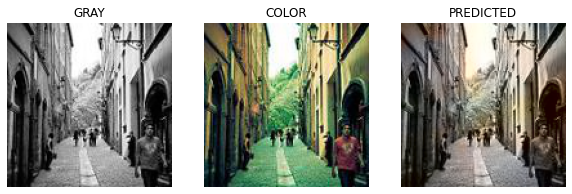

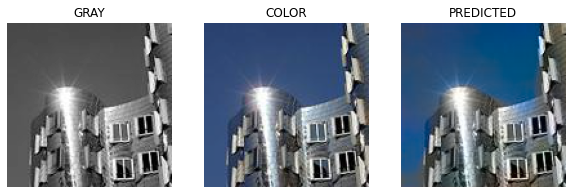

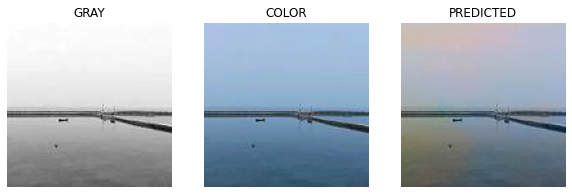

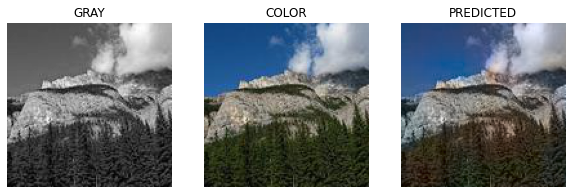

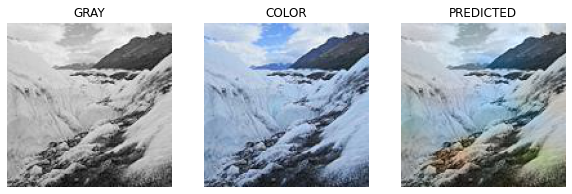

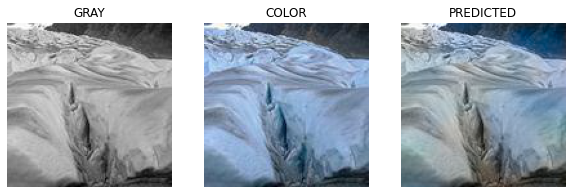

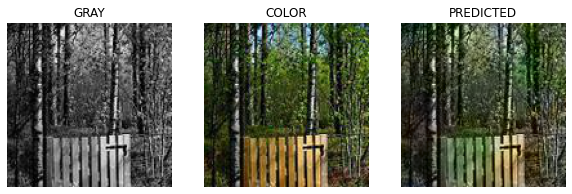

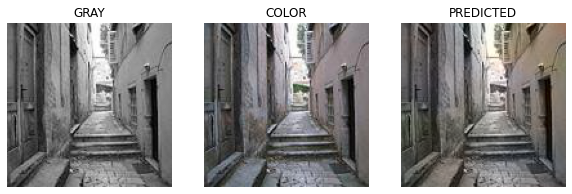

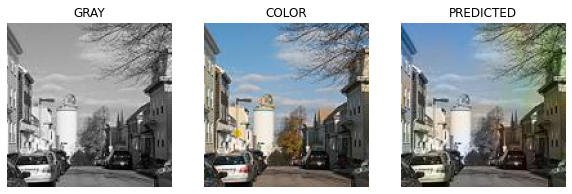

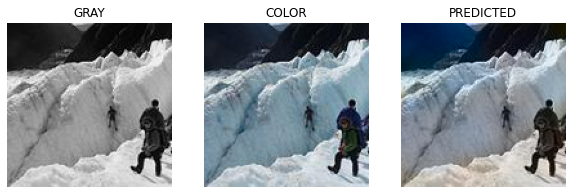

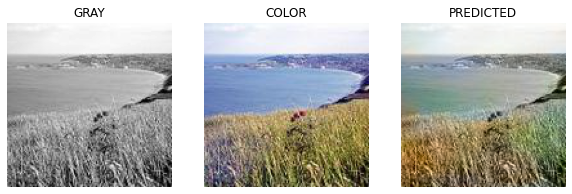

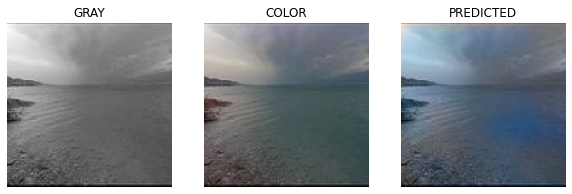

In [8]:
utils.plot_batch(device, test_loader, autoencoder, height=height, width=width, step = 1)